# Twitter Sentiment Analysis

*Computing the emotional sentiment found in tweets between a predetermined date range.*

--------------------------------

### Install any missing packages

In [89]:
'''
import sys
!{sys.executable} -m pip install python-twitter
'''

'\nimport sys\n!{sys.executable} -m pip install python-twitter\n'

In [90]:
import numpy as np
import pandas as pd
import re
import warnings
import os
import twitter
import tweepy
import csv

In [91]:
# visualisations
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

In [93]:
# setting up visualisation
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

In [94]:
%matplotlib inline

--------------------------------

## Authenticate Twitter

### Using Twitter

In [16]:
'''
# uses env variables
api = twitter.Api(
                consumer_key = '{}'.format(os.environ.get('TWITTER_CONSUMER_KEY')),
                consumer_secret = '{}'.format(os.environ.get('TWITTER_CONSUMER_SECRET')),
                access_token_key = '{}'.format(os.environ.get('TWITTER_ACCESS_TOKEN')),
                access_token_secret = '{}'.format(os.environ.get('TWITTER_ACCESS_TOKEN_SECRET'))
)
'''

In [ ]:
'''
# check that it worked
print(api.VerifyCredentials())
'''

### Using Tweepy

In [22]:
auth = tweepy.OAuthHandler('{}'.format(os.environ.get('TWITTER_CONSUMER_KEY')), 
                           '{}'.format(os.environ.get('TWITTER_CONSUMER_SECRET')))
auth.set_access_token('{}'.format(os.environ.get('TWITTER_ACCESS_TOKEN')), 
                      '{}'.format(os.environ.get('TWITTER_ACCESS_TOKEN_SECRET')))
api = tweepy.API(auth, wait_on_rate_limit = True)

In [26]:
#csv_tweets = pd.read_csv('../data/raw/csv_tweets.csv', encoding = "ISO-8859-1")

### Insert tweets into list

In [71]:
tweets = []

for tweet in tweepy.Cursor(api.search,
                           q="@NNSWF",  # change to whatever search param you require
                           count=100,
                           lang="en",
                           since="2019-02-01").items():
    tweets.append(tweet.text)

### Convert list to data.frame and add corrected col

In [75]:
cleaned_tweets = pd.DataFrame({'text' : []})
cleaned_tweets['text'] = np.array(tweets)


#Preprocessing del RT @blablabla:
cleaned_tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(cleaned_tweets['text'])):
    try:
        cleaned_tweets['tweetos'][i] = cleaned_tweets['text'].str.split(' ')[i][0]
    except AttributeError:    
        cleaned_tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(cleaned_tweets['text'])):
    if cleaned_tweets['tweetos'].str.contains('@')[i]  == False:
        cleaned_tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(cleaned_tweets['text'])):
    cleaned_tweets['text'][i] = " ".join([word for word in cleaned_tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


"RT 📰 #HeraldWPL Round 10 Preview Who's ready for some #WallsendWarfare? 🙋 go toe-to-toe with this w…"

### Clean punctuations, force lowercase, delete space.

In [76]:
cleaned_tweets['text'] = cleaned_tweets['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
cleaned_tweets['text'] = cleaned_tweets['text'### Peak at the data].apply(lambda x: re.sub('  ', ' ', x))
cleaned_tweets['text'][1]

"rt 📰 heraldwpl round 10 preview who's ready for some wallsendwarfare 🙋 go toe-to-toe with this w…"

### Output processed data to csv

In [101]:
path = '../data/processed'
cleaned_tweets.to_csv(os.path.join(path, r'processed.csv'), 
                      sep=',', 
                      encoding='utf-8',
                      index=False)

In [3]:
# natural lang tool
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [4]:
# setting up visualisation
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

In [5]:
%matplotlib inline

In [22]:
path = '../data/processed'

cleaned_tweets = pd.read_csv(os.path.join(path, r'processed.csv'))

cleaned_tweets['text'] = cleaned_tweets['text'].astype(str)

## Exploratory Data Analysis

Now that we have our tweets in a manageable format, it's time to do some digging. In this section, we will go through some visualisations as well as summary statistics to identify commonly used phrases and the overall mood of the topic at hand. The contents of this section are:
1. Word Frequency Cloud
2. Placeholder

#### Examining Word Frequency

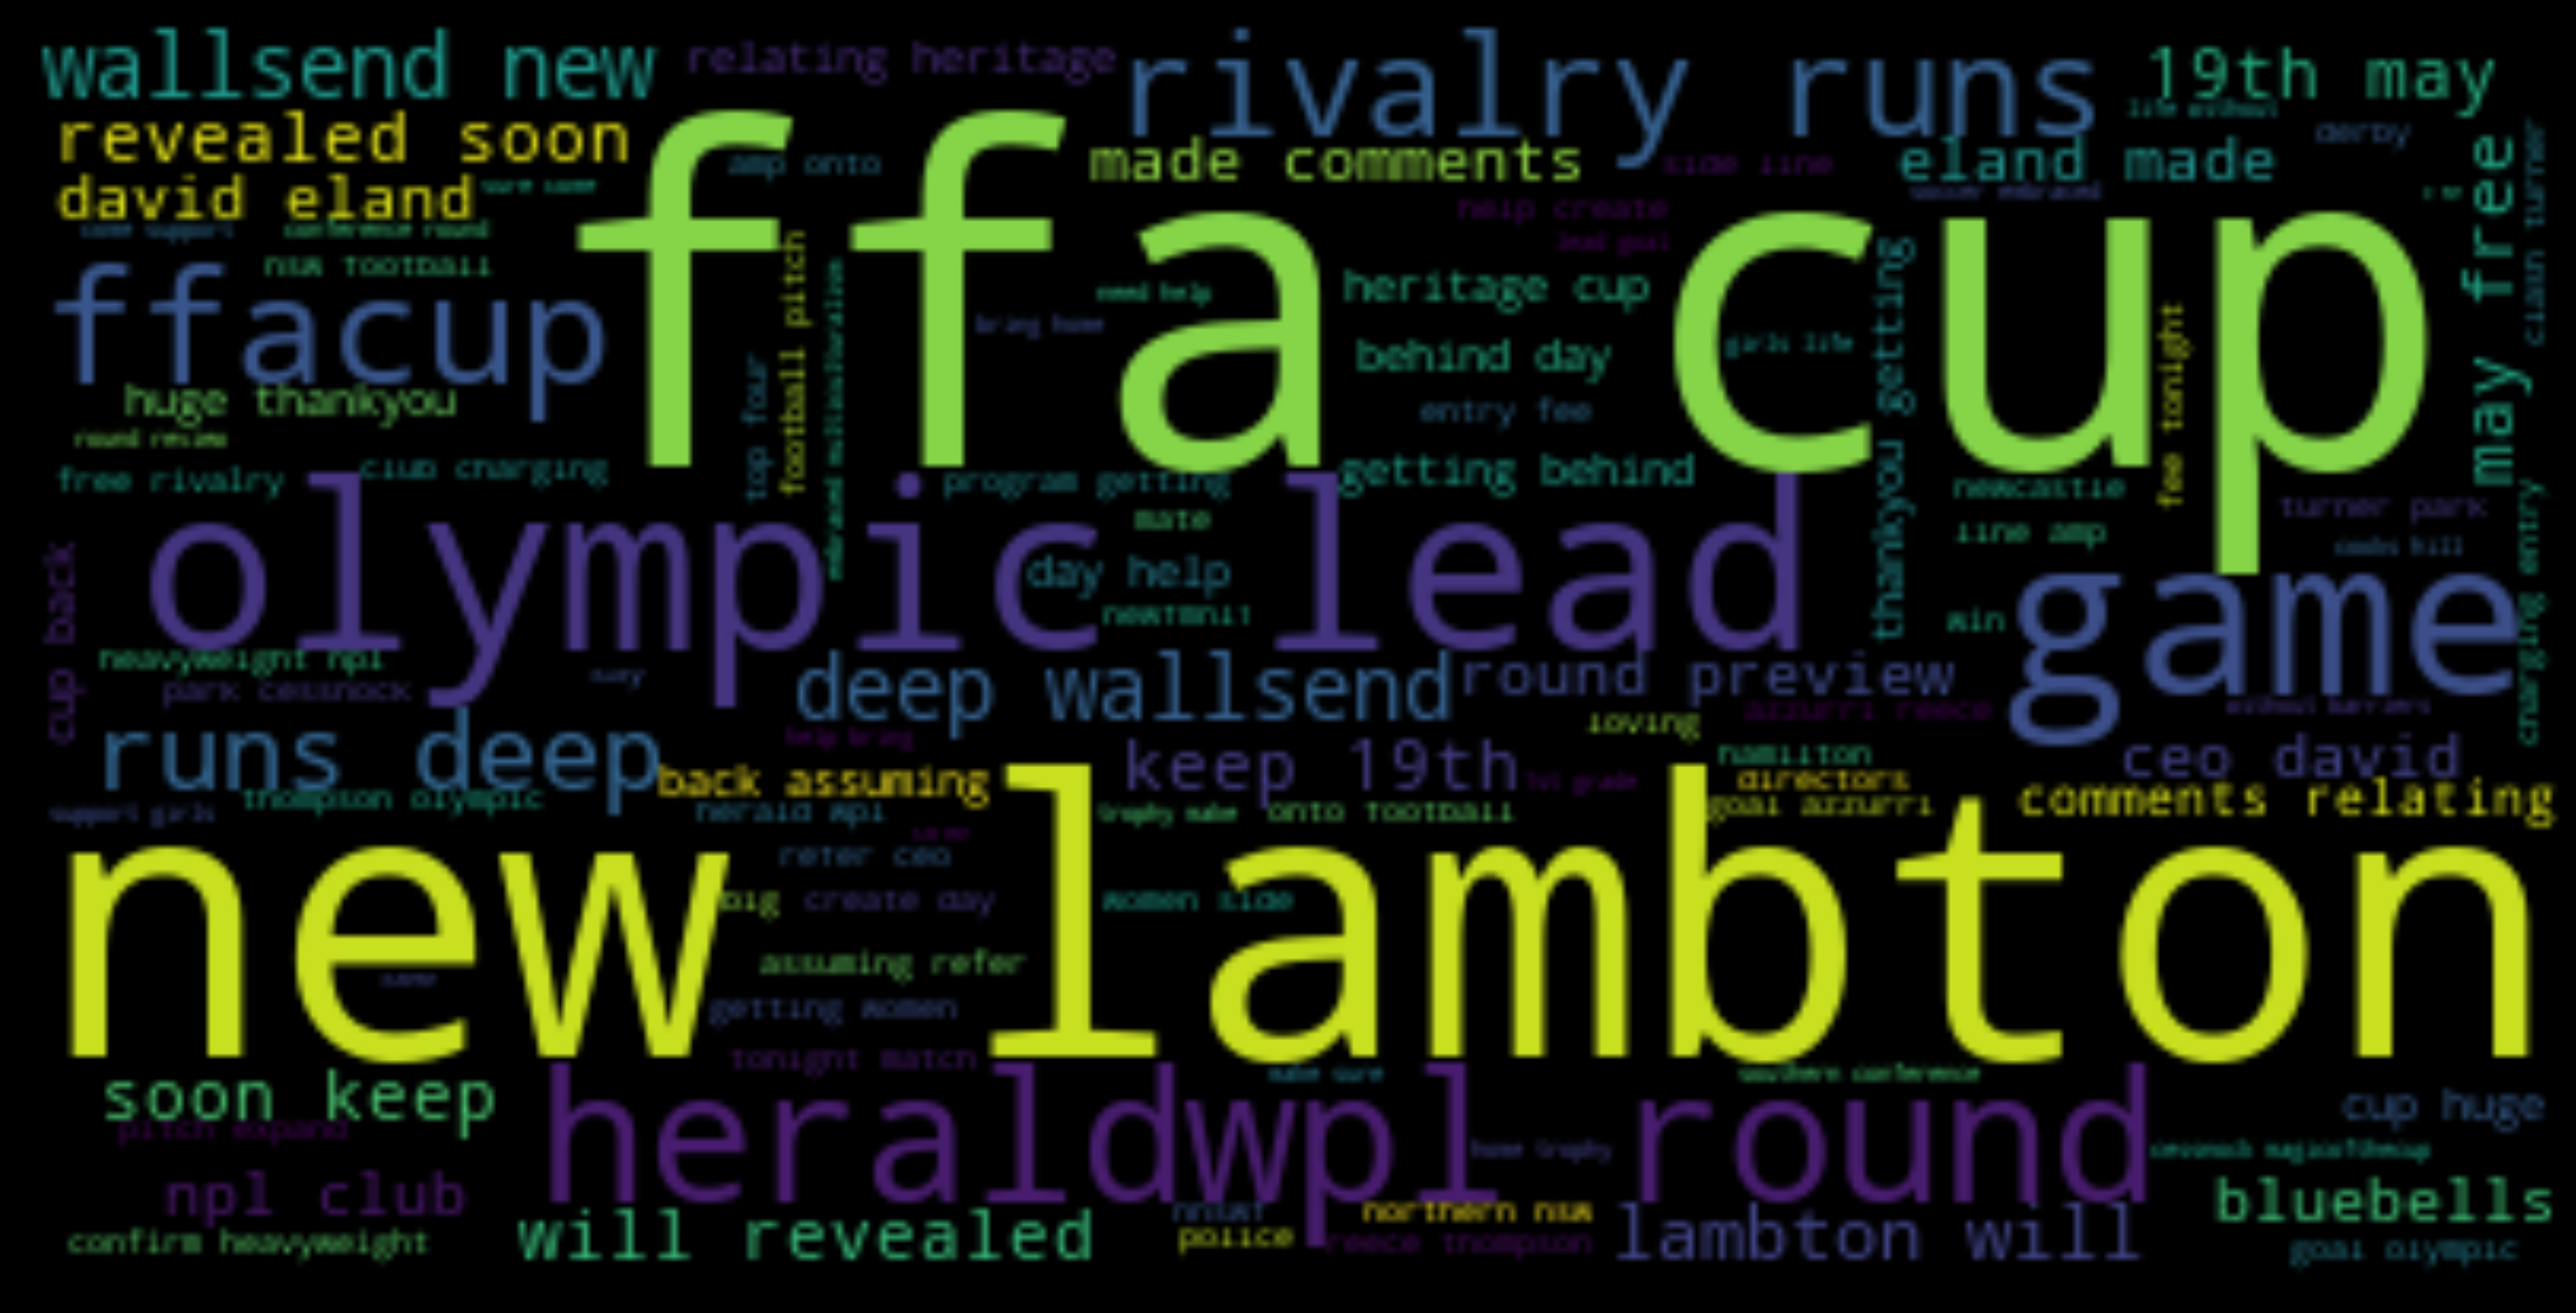

In [24]:
def wordcloud(cleaned_tweets,col):
    stopwords = set(STOPWORDS)
    stopwords.update(["rt","rt ceo"]) # add any extra stopwords
    wordcloud = WordCloud(background_color="black",
                          stopwords=stopwords,
                          random_state = 2016).generate(" ".join([i for i in cleaned_tweets[col]]))
    plt.figure(figsize=(50,50), facecolor='k')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("@NNSWF Word Cloud")
    
wordcloud(cleaned_tweets,'text')